In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import sys, random
from problem import *
from utils import *
from math import inf
from itertools import permutations

In [2]:
G = nx.complete_graph(25)
for (u, v) in G.edges():
    G.edges[u,v]['weight'] = random.randint(0,10)

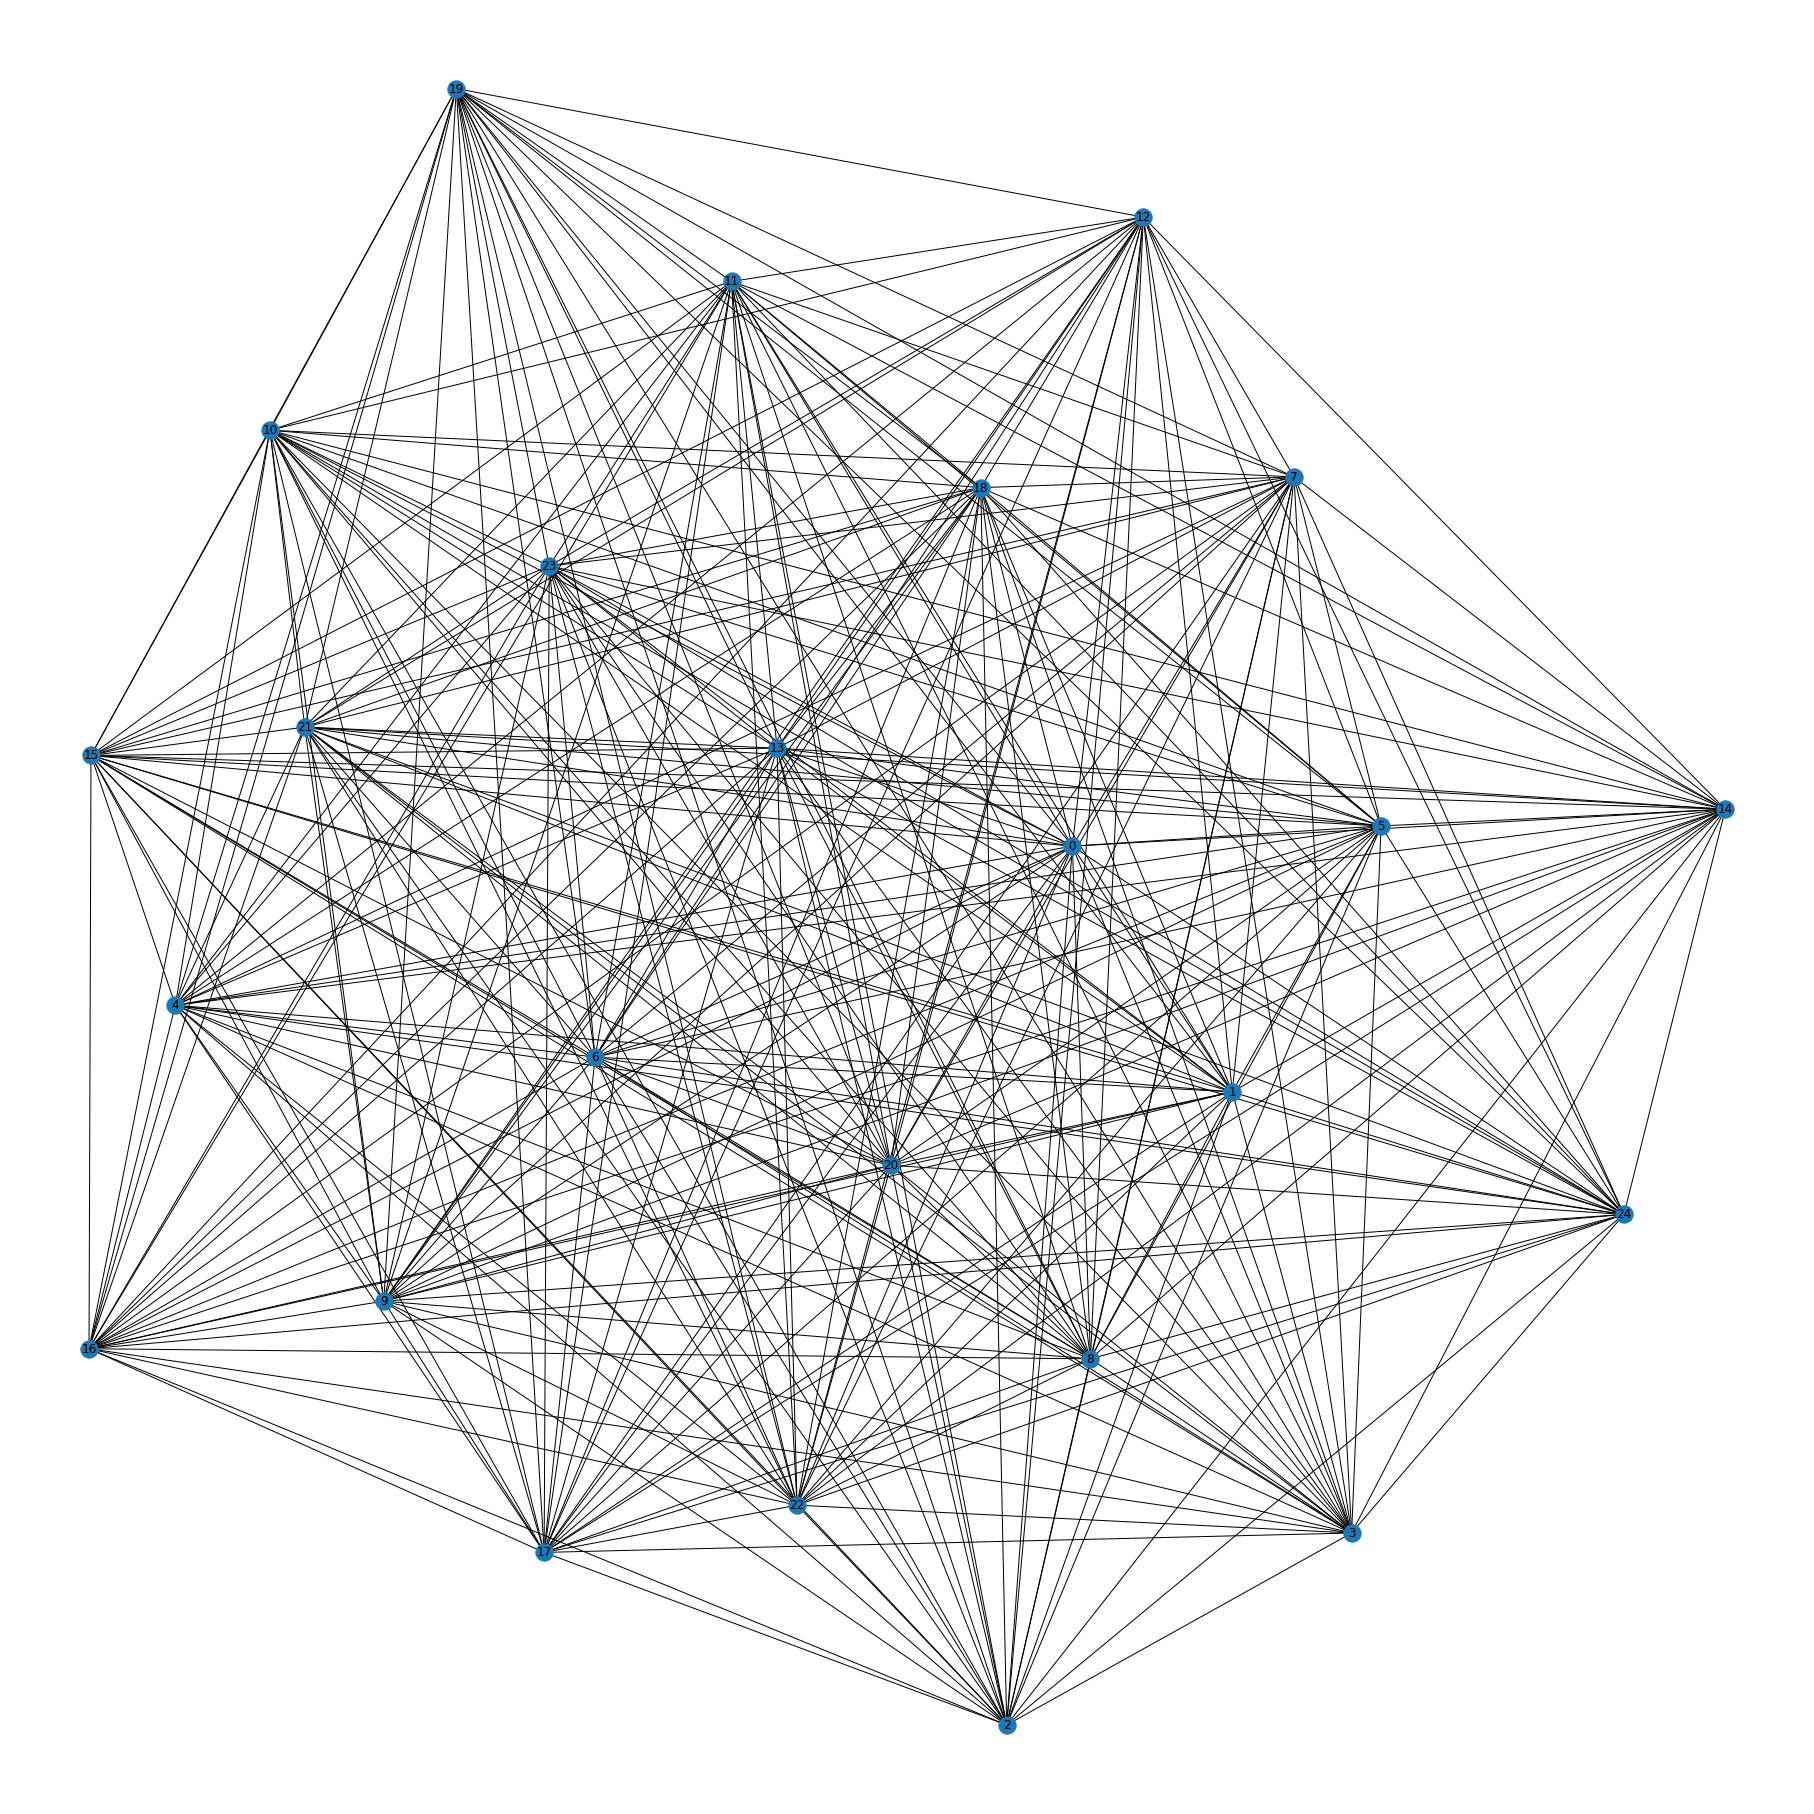

In [3]:
plt.figure(figsize=(25,25)) 
nx.draw(G, with_labels=True)
plt.show()

In [4]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24))

In [5]:
import random

In [6]:
def random_permutation(iterable, r=None, number_of_perms = 50):
    "Random selection from itertools.permutations(iterable, r)"
    for i in range(number_of_perms):
        pool = tuple(iterable)
        r = len(pool) if r is None else r
        yield tuple(random.sample(pool, r))